In [19]:
import scanpy as sc
import scanorama
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
adata1 = sc.read_h5ad('I:\\mutiomics\\ICC\\BMK240704-CD182-ZX01-0101\\BMK_DATA_20240828172206_1\\Matrix\\backup\\Unknown_CD182-0050002_BSTViewer_project\\subdata\\L6_heAuto\\anndata.h5ad')
adata2 = sc.read_h5ad('I:\\mutiomics\\ICC\\BMK240704-CD182-ZX01-0101\\BMK_DATA_20240828172206_1\\Matrix\\backup\\Unknown_CD182-0050001_BSTViewer_project\\subdata\\L6_heAuto\\anndata.h5ad')
adata3 = sc.read_h5ad('I:\\mutiomics\\ICC\\run2_WT\\BMK240704-CD182-ZX01-0102\\BMK_DATA_20241128174824_1\\backup\\Unknown_CD182-0060001_BSTViewer_project\\subdata\\L6_heAuto\\anndata.h5ad')


In [21]:
adatas = [adata1, adata2,adata3]

# 使用 scanorama 进行整合
adatas = scanorama.correct_scanpy(adatas)

# 将结果整合到一个 AnnData 对象中
adata_combined = adatas[0].concatenate(*adatas[1:])

Found 16850 genes among all datasets
[[0.         0.4717082  0.00289584]
 [0.         0.         0.42628396]
 [0.         0.         0.        ]]
Processing datasets (0, 1)
Processing datasets (1, 2)


C:\Users\28123\AppData\Local\Temp\ipykernel_9364\3944563619.py:7: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_combined = adatas[0].concatenate(*adatas[1:])


In [22]:
adata_combined

AnnData object with n_obs × n_vars = 37700 × 16850
    obs: 'mt_frac', 'total_counts', 'n_counts', 'n_genes', 'clusters', 'batch'
    var: 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells-2', 'highly_variable-2', 'means-2', 'dispersions-2', 'dispersions_norm-2'
    obsm: 'X_pca', 'X_umap', 'spatial'

In [29]:
sc.pp.normalize_total(adata_combined, inplace = True)
#sc.pp.log1p(adata_combined)
sc.pp.highly_variable_genes(adata_combined, flavor='seurat', n_top_genes=2000, inplace=True)
sc.pp.pca(adata_combined, n_comps=50, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata_combined,n_neighbors=20)
sc.tl.umap(adata_combined)
sc.tl.leiden(adata_combined, key_added='clusters')

normalizing counts per cell
    finished (0:00:03)
extracting highly variable genes


I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:276: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)


    finished (0:00:20)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA


I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\preprocessing\_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


    with n_comps=50
    finished (0:00:35)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:08)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:38)
running Leiden clustering
    finished: found 11 clusters and added
    'clusters', the cluster labels (adata.obs, categorical) (0:00:21)


-----
anndata     0.10.7
scanpy      1.10.1
-----
PIL                         10.3.0
annoy                       NA
anyio                       NA
arrow                       1.3.0
asttokens                   NA
attr                        23.2.0
attrs                       23.2.0
babel                       2.14.0
certifi                     2024.02.02
cffi                        1.16.0
charset_normalizer          3.3.2
colorama                    0.4.6
comm                        0.2.2
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.9.0.post0
debugpy                     1.8.1
decorator                   5.1.1
defusedxml                  0.7.1
exceptiongroup              1.2.1
executing                   2.0.1
fastjsonschema              NA
fbpca                       NA
fqdn                        NA
h5py                        3.11.0
idna                        3.7
igraph                      0.11.4
intervaltree                NA
ipyke

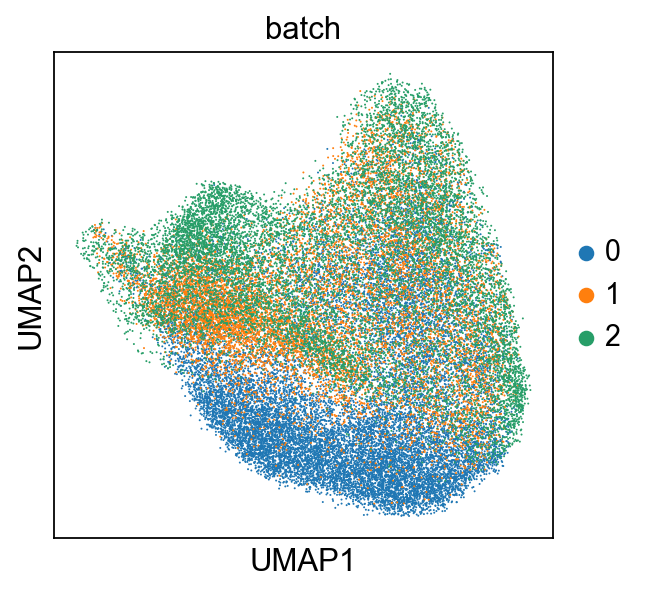

In [30]:
plt.rcParams['figure.figsize']=(8,8)
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)
sc.pl.umap(adata_combined, color='batch', palette=sc.pl.palettes.default_20)

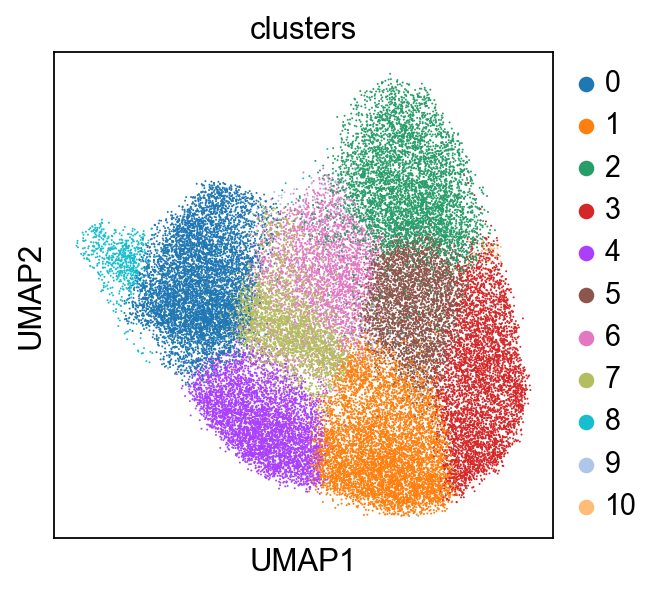

In [31]:
sc.pl.umap(adata_combined, color='clusters', palette=sc.pl.palettes.default_20)

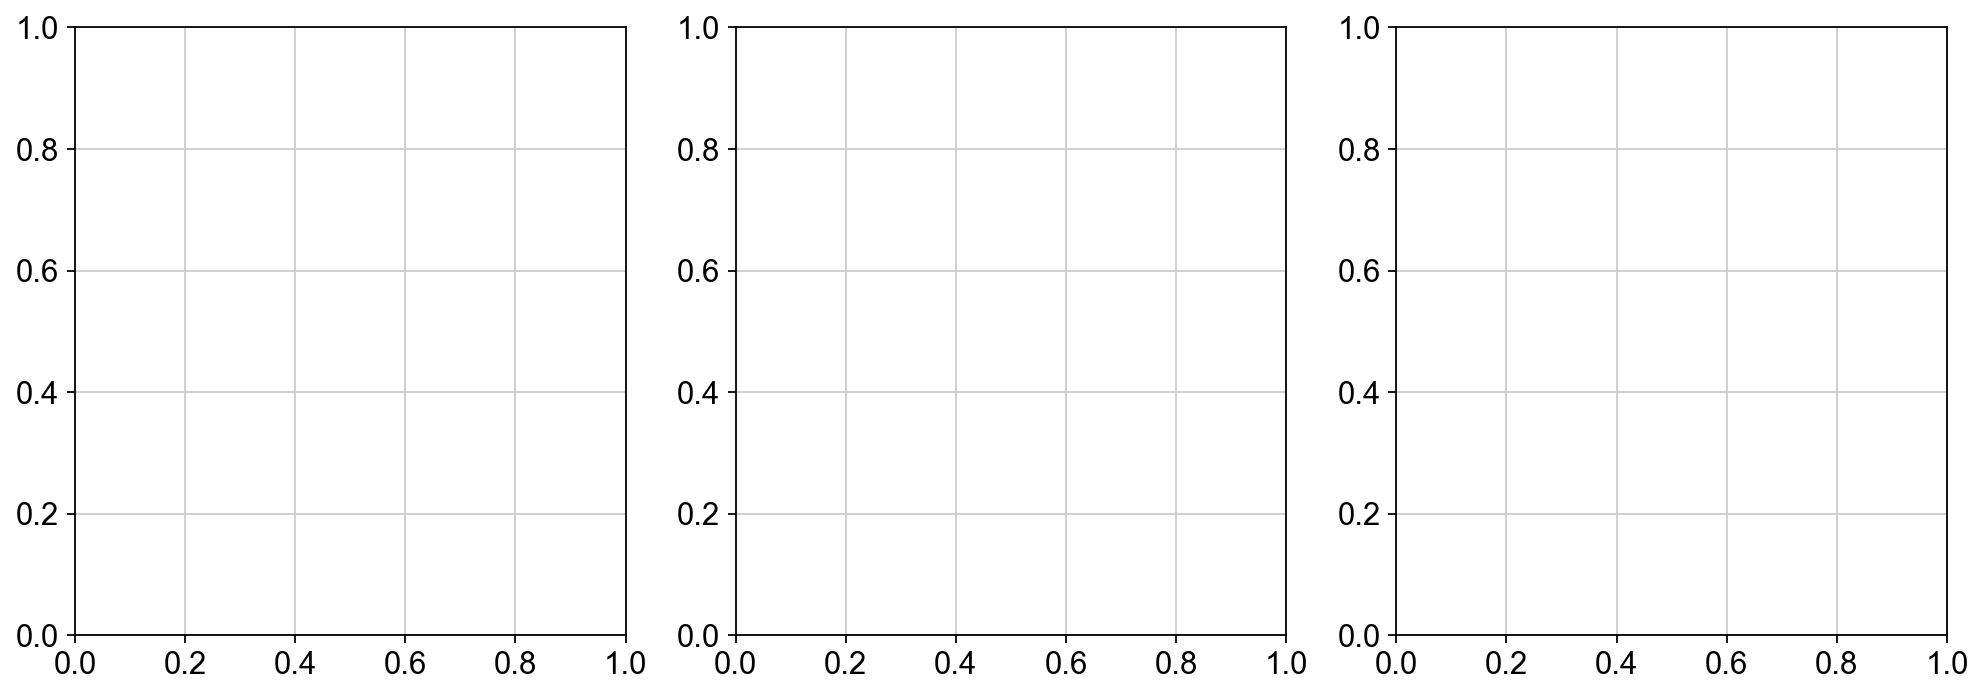

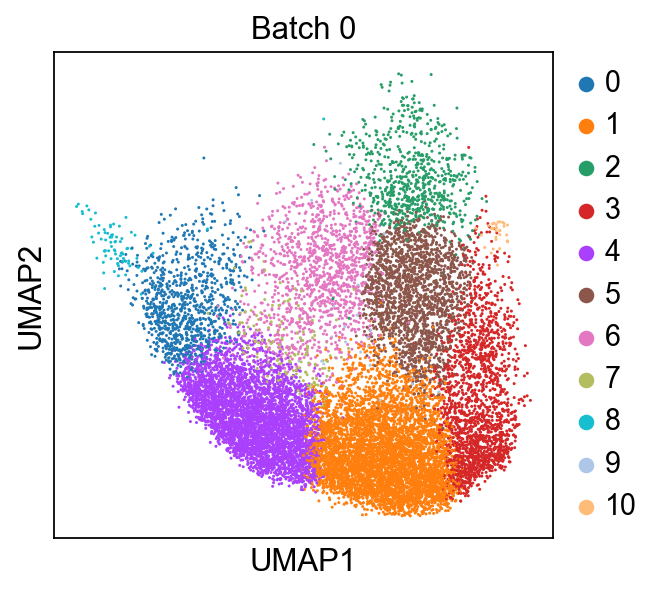

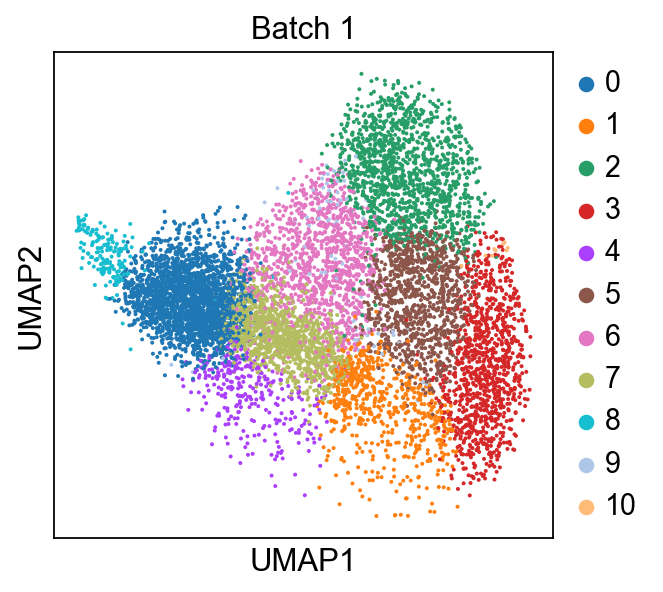

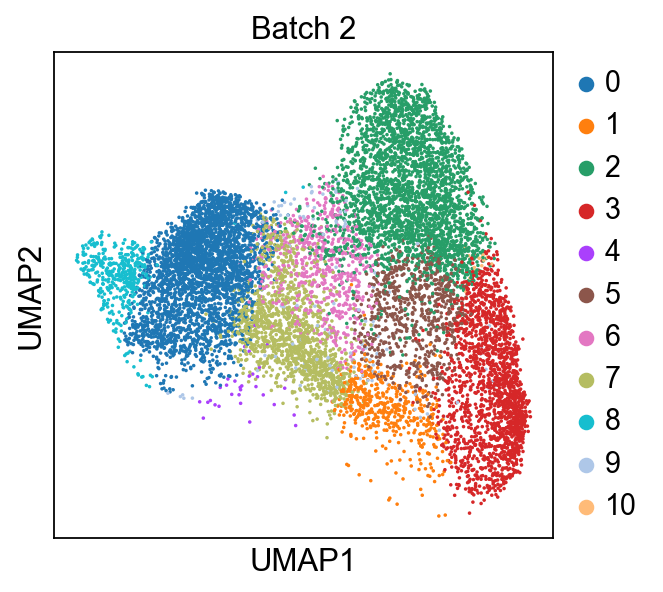

<Figure size 320x320 with 0 Axes>

In [32]:
import scanpy as sc
import matplotlib.pyplot as plt

# 获取批次列的唯一值，例如 'batch'
batches = adata_combined.obs['batch'].unique()

# 创建一个绘图网格，nrows和ncols可以根据你的数据集数量来调整
ncols = len(batches)
fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(5 * ncols, 5))

# 如果只有一行，则axes是一个数组，否则它是二维数组
if ncols == 1:
    axes = [axes]

# 遍历每个批次并绘制对应的UMAP图
for i, batch in enumerate(batches):
    subset = adata_combined[adata_combined.obs['batch'] == batch, :]
    sc.pl.umap(subset, color='clusters', show=True, title=f'Batch {batch}')

# 显示图形
plt.tight_layout()
plt.show()


In [34]:
adata_combined.obs.to_csv("I:\\mutiomics\\ICC\\run2_WT\\clusters.csv", index=False)

In [10]:
adata1.obs['batches'] = "KO"
adata2.obs['batches'] = "WT"
adata3.obs['batches'] = "WT"

In [12]:
adata2.obs

mt_frac  total_counts  n_counts  n_genes clusters batches
0          0.0        5380.0    5380.0     1895        2      WT
1          0.0        6510.0    6510.0     1972        2      WT
2          0.0        5706.0    5706.0     1795        3      WT
3          0.0        3621.0    3621.0     1394        3      WT
4          0.0        3052.0    3052.0     1233        2      WT
...        ...           ...       ...      ...      ...     ...
12064      0.0        2047.0    2047.0     1390        8      WT
12065      0.0        1584.0    1584.0      911        8      WT
12066      0.0        1641.0    1641.0     1003        8      WT
12067      0.0        1593.0    1593.0      953        8      WT
12070      0.0        1545.0    1545.0      813        8      WT

[9349 rows x 6 columns]

In [13]:
adata1.obs['combine_cluster']=adata_combined.obs["clusters"][:16610].values
adata2.obs['combine_cluster']=adata_combined.obs["clusters"][16610:9349+16610].values
adata3.obs['combine_cluster']=adata_combined.obs["clusters"][9349+16610:].values

In [18]:
adata2.obs

mt_frac  total_counts  n_counts  n_genes clusters batches  \
0          0.0        5380.0    5380.0     1895        2      WT   
1          0.0        6510.0    6510.0     1972        2      WT   
2          0.0        5706.0    5706.0     1795        3      WT   
3          0.0        3621.0    3621.0     1394        3      WT   
4          0.0        3052.0    3052.0     1233        2      WT   
...        ...           ...       ...      ...      ...     ...   
12064      0.0        2047.0    2047.0     1390        8      WT   
12065      0.0        1584.0    1584.0      911        8      WT   
12066      0.0        1641.0    1641.0     1003        8      WT   
12067      0.0        1593.0    1593.0      953        8      WT   
12070      0.0        1545.0    1545.0      813        8      WT   

      combine_cluster  
0                   6  
1                   6  
2                   6  
3                   6  
4                   6  
...               ...  
12064               6  
12065               3  
12066               3  
12067               3  
12070               3  

[9349 rows x 7 columns]

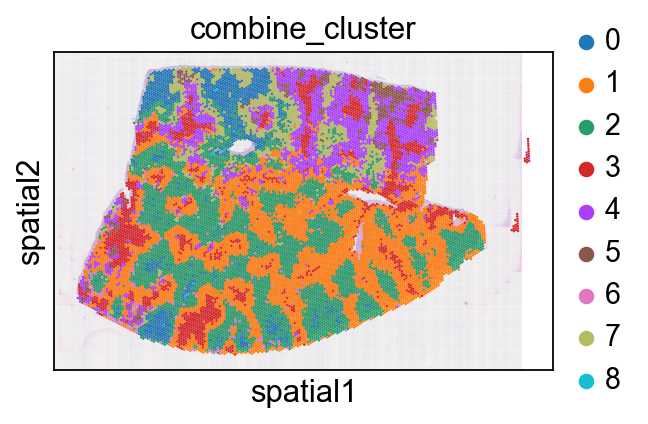

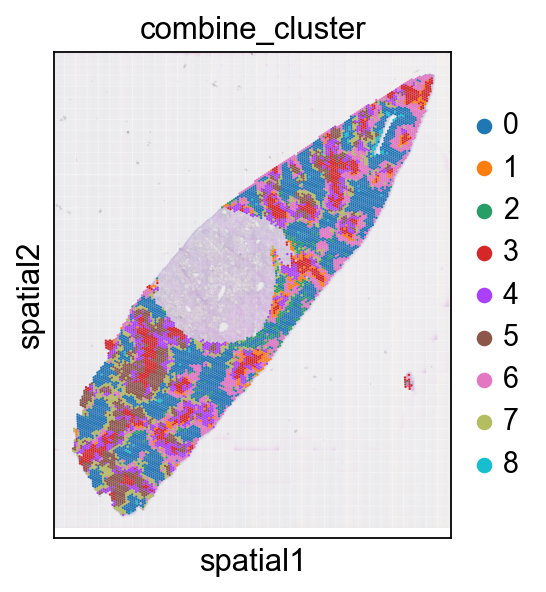

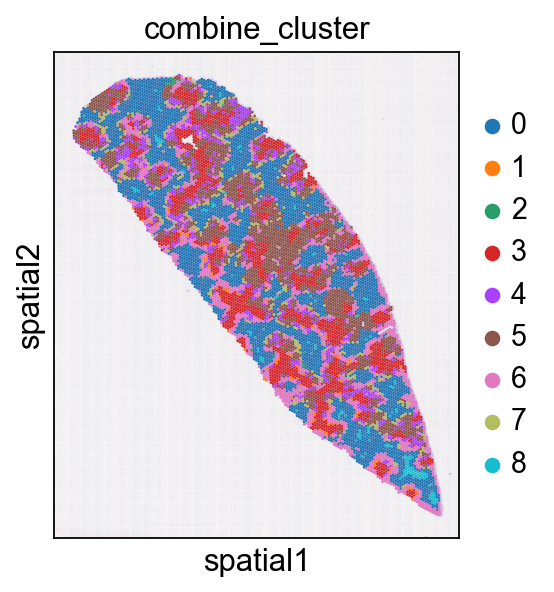

In [15]:
sc.pl.spatial(adata1, img_key = "hires",alpha_img=0.5, color="combine_cluster",size=1)
sc.pl.spatial(adata2, img_key = "hires",alpha_img=0.5, color="combine_cluster",size=1)
sc.pl.spatial(adata3, img_key = "hires",alpha_img=0.5, color="combine_cluster",size=1)

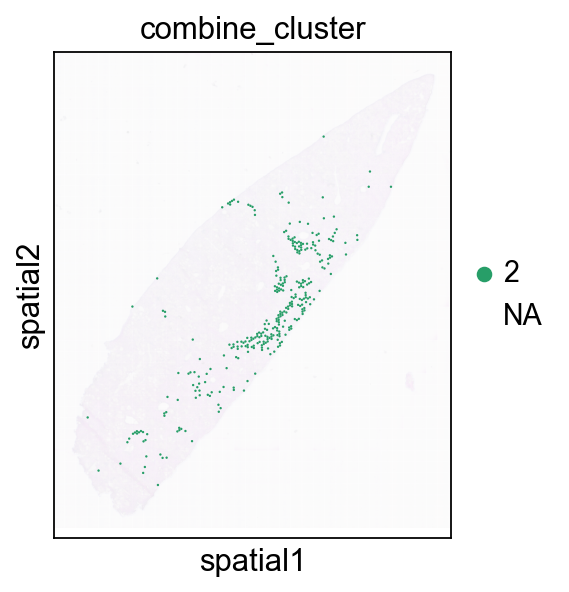

In [107]:
sc.pl.spatial(adata2, img_key = "hires",alpha_img=0.1, color="combine_cluster",size=1,groups=["2"])

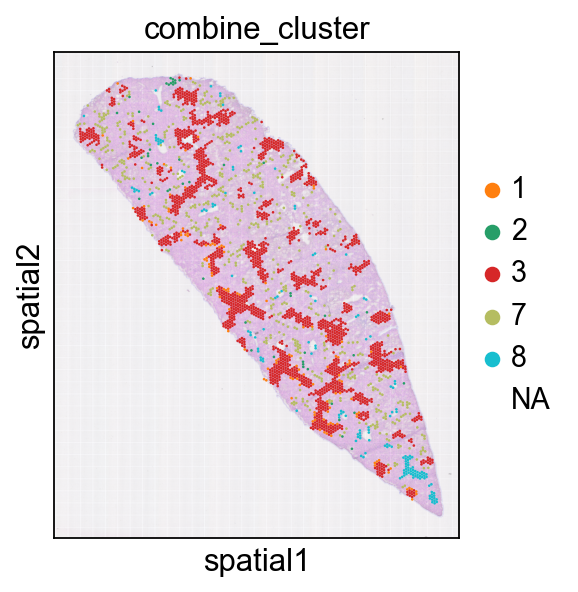

In [119]:
sc.pl.spatial(adata3, img_key = "hires",alpha_img=0.5, color="combine_cluster",size=1,groups=["1","2","3","7","8"])

In [16]:
adata1.write("I:\\mutiomics\\ICC\\run2_WT\\anndata_KO.h5ad")
adata2.write("I:\\mutiomics\\ICC\\run2_WT\\anndata_WT1.h5ad")
adata3.write("I:\\mutiomics\\ICC\\run2_WT\\anndata_WT2.h5ad")

In [17]:
adata_combined.write("I:\\mutiomics\\ICC\\run2_WT\\anndata_combine.h5ad")

In [25]:
sc.tl.rank_genes_groups(adata_combined, groupby='clusters', method='wilcoxon')

ranking genes


I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
I:\mutiomics\pythonProjec

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:03:16)


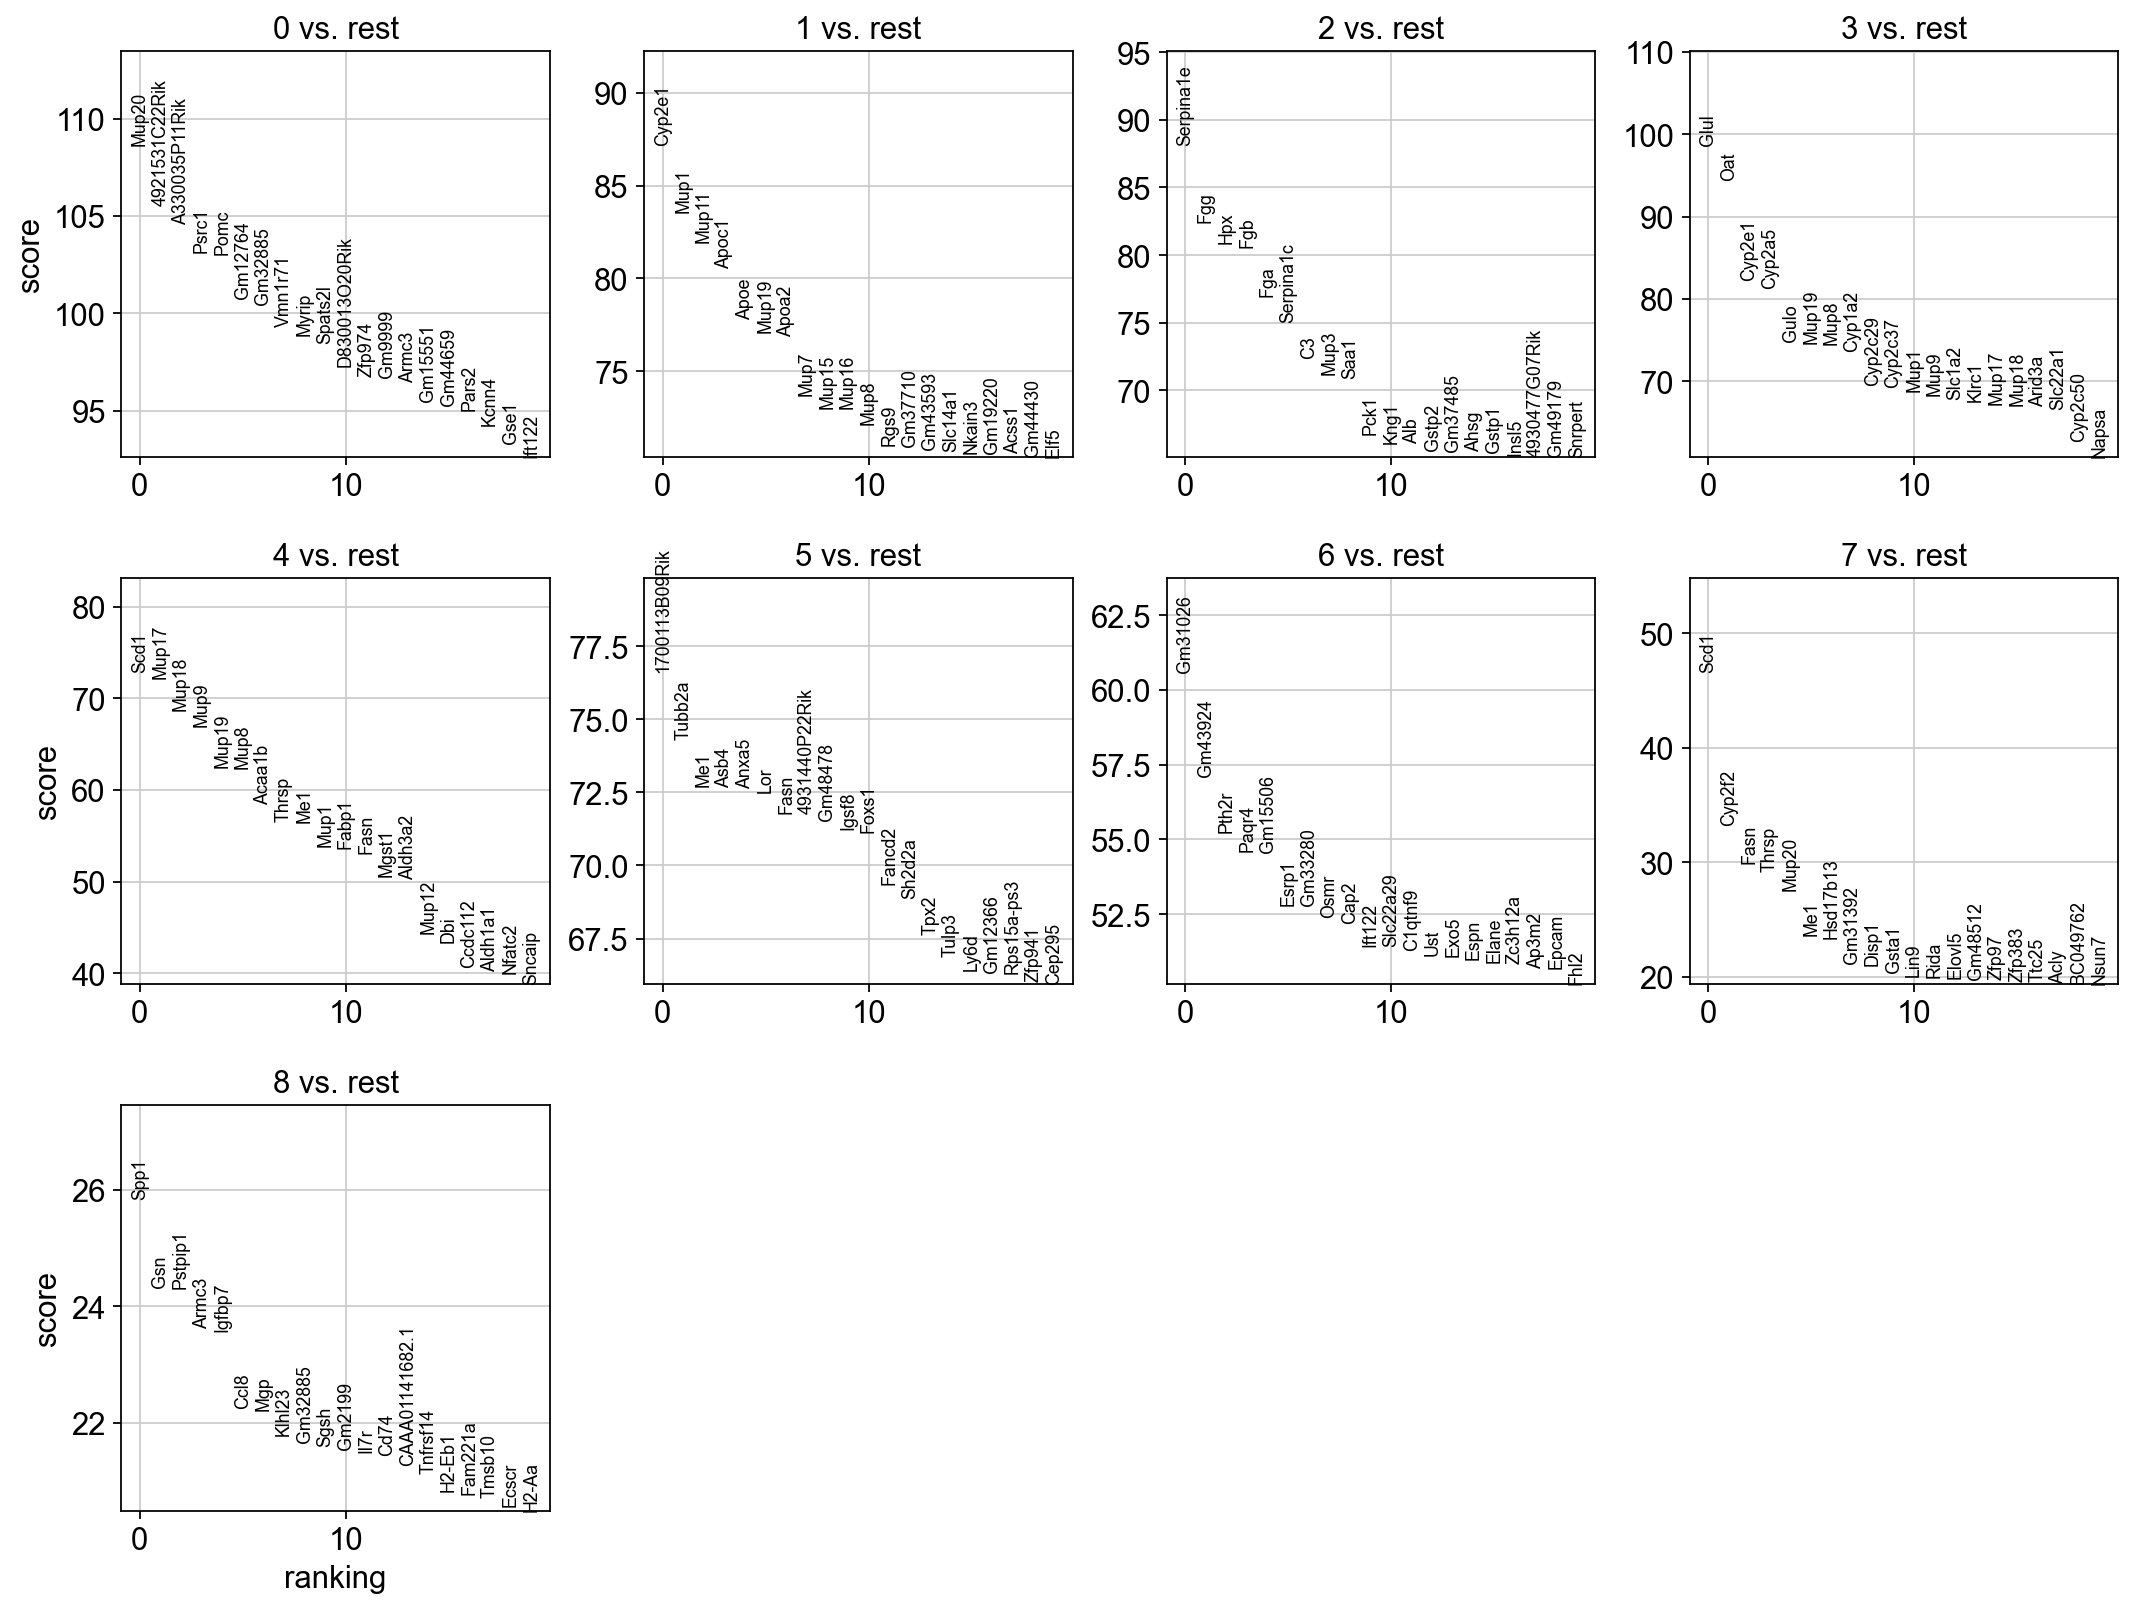

  group          names      scores  logfoldchanges  pvals  pvals_adj
0     0          Mup20  108.648193        0.297674    0.0        0.0
1     0  4921531C22Rik  105.564476        0.062805    0.0        0.0
2     0  A330035P11Rik  104.602036        0.165634    0.0        0.0
3     0          Psrc1  103.125229        0.498391    0.0        0.0
4     0           Pomc  103.044876       -0.133977    0.0        0.0


In [26]:
# 绘制每个群体的 top 20 差异表达基因
sc.pl.rank_genes_groups(adata_combined, n_genes=20, sharey=False)

# 或者将结果提取为pandas DataFrame
import pandas as pd

# 获取特定群体的差异表达基因数据，默认提取所有群体
marker_genes_df = sc.get.rank_genes_groups_df(adata_combined, group=None)

# 打印前几行数据查看结果
print(marker_genes_df.head())


In [45]:
marker_genes_df.to_csv("I:\\mutiomics\\ICC\\run2_WT\\anndata_combine_marker_genes.csv", index=False)

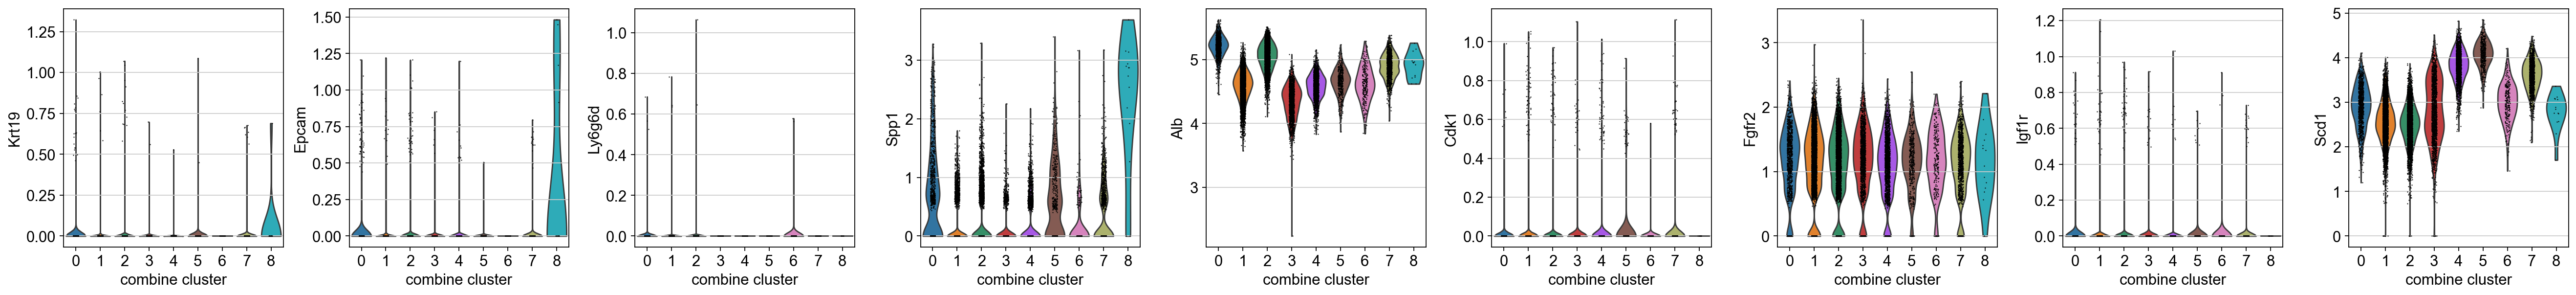

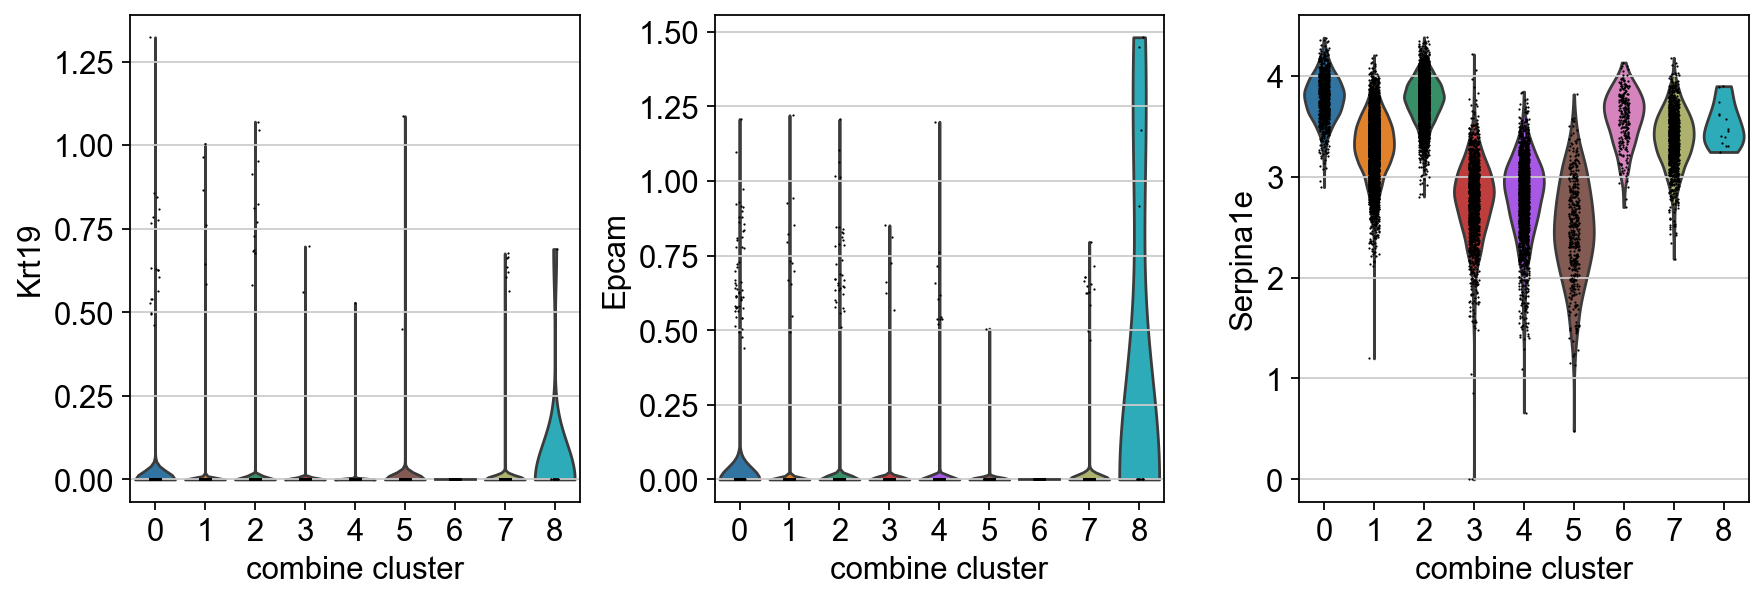

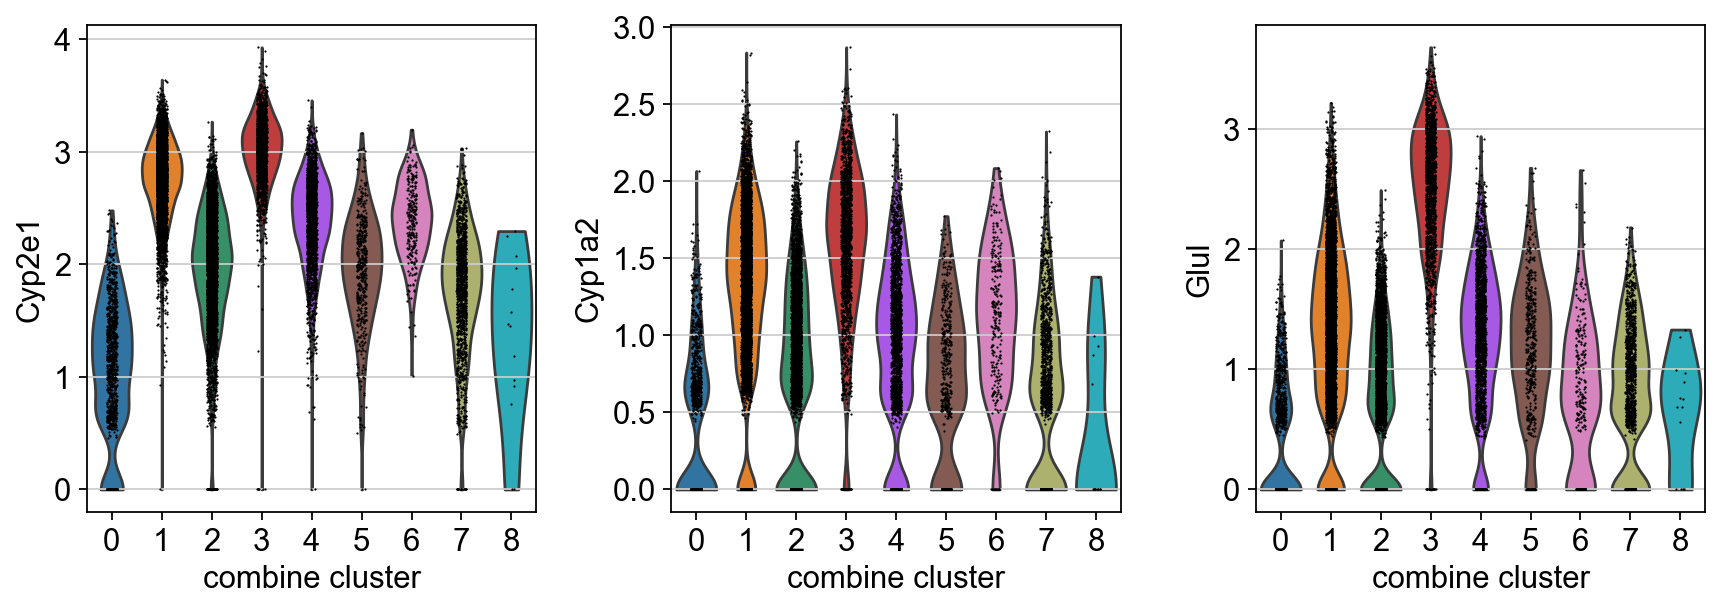

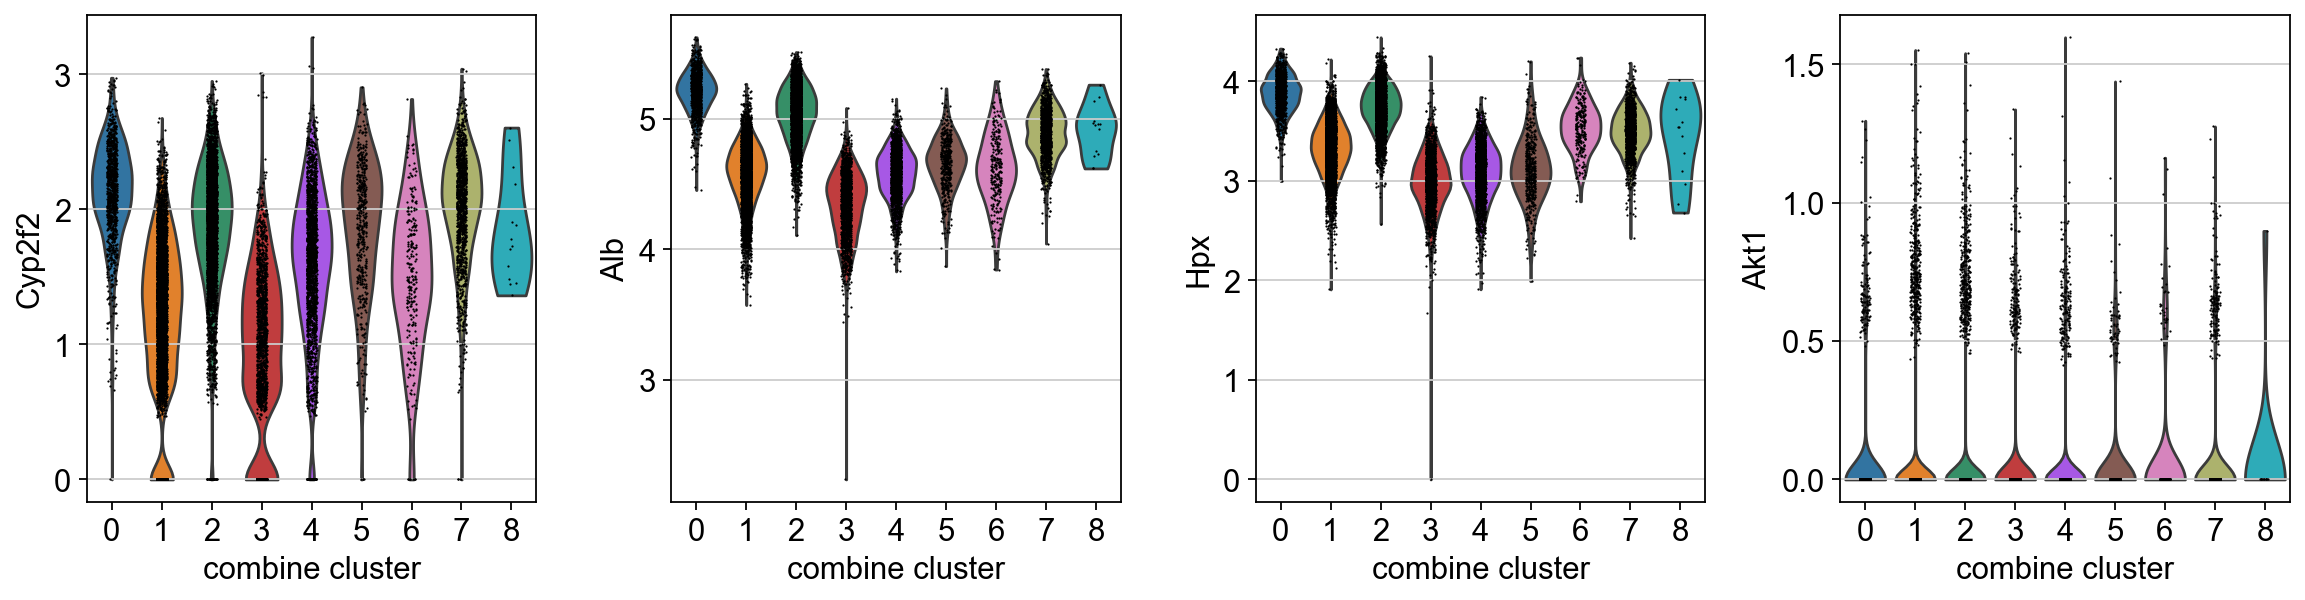

In [109]:
sc.pl.violin(adata1, ['Krt19', "Epcam",'Ly6g6d',"Spp1","Alb","Cdk1","Fgfr2","Igf1r","Scd1"], groupby='combine_cluster')
sc.pl.violin(adata1, ['Krt19', "Epcam","Serpina1e"], groupby='combine_cluster')
sc.pl.violin(adata1, ['Cyp2e1', "Cyp1a2","Glul"], groupby='combine_cluster')
sc.pl.violin(adata1, ['Cyp2f2', "Alb","Hpx","Akt1"], groupby='combine_cluster')

In [99]:
gene_names = adata2.var_names
# 筛选出所有以 "pad" 开头的基因
pad_genes = [gene for gene in gene_names if gene.startswith('Ly6g')]

# 打印出这些基因
print(pad_genes)

['Ly6g6d', 'Ly6g6e']
